## Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
import matplotlib

## Data Load

In [2]:
df=pd.read_csv(r"D:\PYTHON\ML\Datas\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True) #Drop unwanted columns 

## Data cleaning 

In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.dropna(inplace=True) #drop Nan values 

In [9]:
df.shape

(13246, 5)

In [10]:
df.size=df['size'].apply(lambda x: int(x.split(' ')[0])) #converting string into integer datatype
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [11]:
def check_float(x):
    try:
        float(x)
    except:
        return False 
    return True


In [12]:
df[~df.total_sqft.apply(check_float)]

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,59.135


In [13]:
def conv_float(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[0]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df.total_sqft=df['total_sqft'].apply(conv_float)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [15]:
df1=df[df['total_sqft'].notnull()]

In [16]:
df1.loc[122] #After average the values 

location      Hebbal
size               4
total_sqft    3067.0
bath             4.0
price          477.0
Name: 122, dtype: object

## Feature Engineering

In [17]:
import warnings 
warnings.filterwarnings('ignore')

In [18]:
df1['price_per_sqft']=(df1['price']*100000)/df1.total_sqft  #Add new feature price_per_sqft from existing feature
df1.sample(3)

,location,size,total_sqft,bath,price,price_per_sqft
11038,EPIP Zone,2,1810.0,2.0,65.0,3591.160221
4464,Somasundara Palya,2,1185.0,2.0,70.0,5907.172996
11271,Bisuvanahalli,2,845.0,2.0,32.0,3786.982249


In [19]:
df1['price_per_sqft'].describe()

count    1.320000e+04
mean     7.926673e+03
std      1.067271e+05
min      2.678298e+02
25%      4.271723e+03
50%      5.446151e+03
75%      7.325581e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
location_stats=df1['location'].value_counts()
location_stats

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [21]:
location_stats.values.sum()

13200

In [22]:
len(location_stats)

1298

In [23]:
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: count, Length: 1058, dtype: int64

In [24]:
df1['location']=df1['location'].apply(lambda x:'other' if x in location_stats_lessthan_10 else x)

In [25]:
df1['location'].value_counts()

location
other                        2887
Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: count, Length: 241, dtype: int64

In [26]:
df1['location'].nunique()

241

In [27]:
df1.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


## Outlier Removal

In [28]:
df1=df1[~(df1['total_sqft']/df1['size']<300)]

In [29]:
df1.shape

(12454, 6)

In [30]:
df1.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [31]:
df1.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
price_per_sqft    0
dtype: int64

In [32]:
df1['price_per_sqft'].describe() #clearly there is a variation in prices min(267 )to max (176470)

count     12454.000000
mean       6314.817214
std        4168.946252
min         267.829813
25%        4214.344641
50%        5299.842271
75%        6922.910519
max      176470.588235
Name: price_per_sqft, dtype: float64

## Outlier Removal by statistical method

In [33]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2=remove_outliers(df1)
        

In [34]:
df2.shape

(10265, 6)

In [35]:
df2.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Devarachikkanahalli,3,1250.0,2.0,44.0,3520.000000
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509


In [36]:
df2['bhk']=df2['size'].apply(lambda x: int(x))

## Outlier Detection by Visualization

In [37]:
def visual(df,location):
    df_bhk2=df[(df.location==location) & (df.bhk==2)]
    df_bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']==(15,20)
    plt.scatter(df_bhk2.total_sqft, df_bhk2.price, marker='*',color='red',s=50,label='2bhk')
    plt.scatter(df_bhk3.total_sqft, df_bhk3.price, marker='+',color='green',s=50,label='3bhk')
    plt.xlabel('Total_sqft')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    
    

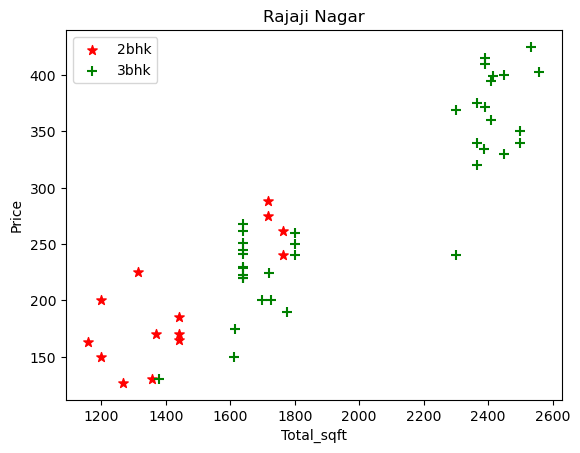

In [38]:
visual(df2,'Rajaji Nagar')

In [39]:
#Here we can find some of the outliers 

## Remove outliers based on bhk and price

In [40]:
def remv_outliers_stats(df):
    exclide_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclide_indices=np.append(exclide_indices,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclide_indices,axis='index')

        

In [41]:
df3=remv_outliers_stats(df2)
df3.shape

(7310, 7)

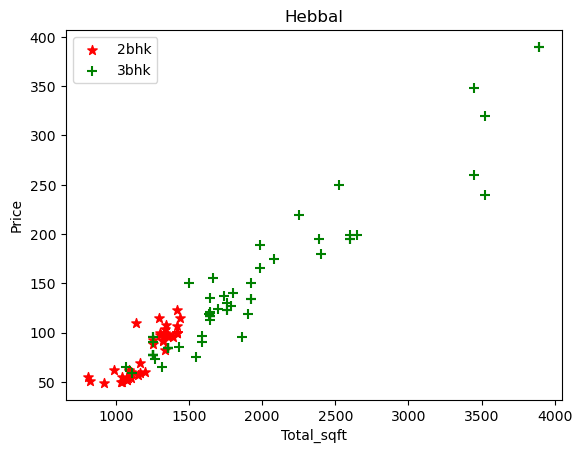

In [42]:
visual(df2,'Hebbal')

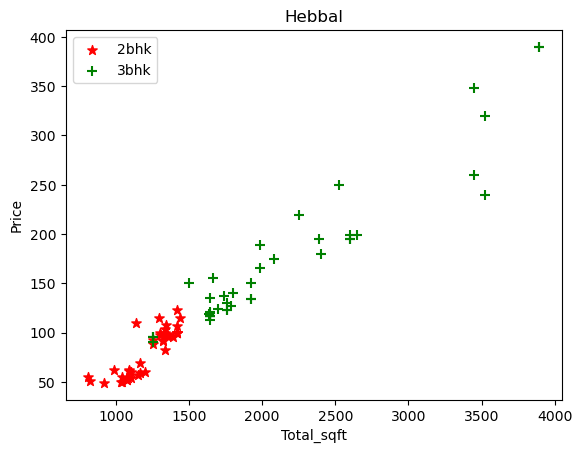

In [43]:
visual(df3,'Hebbal')

In [44]:
## By comparing These two visuals we can conclude that the outlier is removed 

In [45]:
#outlier removel by bathroom feature 

In [46]:
df2['bath'].value_counts() # here we can see some of the exception like 9,10,11,12

bath
2.0     5932
3.0     2628
4.0      678
1.0      621
5.0      238
6.0      109
7.0       27
8.0       17
9.0       10
12.0       3
16.0       1
13.0       1
Name: count, dtype: int64

In [47]:
df3['bath']=df3['bath'].apply(lambda x: int(x))

In [49]:
df3[df3.bath==9] # here 6bhk house has 9 bathroom it doesn't make any sense so that is an outlier  

,location,size,total_sqft,bath,price,price_per_sqft,bhk
3780,KR Puram,9,4600.0,9,200.0,4347.826087,9
5117,Mico Layout,9,5000.0,9,210.0,4200.000000,9
5664,Raja Rajeshwari Nagar,9,3600.0,9,240.0,6666.666667,9
8034,other,11,5000.0,9,360.0,7200.000000,11
8422,other,6,11338.0,9,1000.0,8819.897689,6
8773,other,9,4500.0,9,500.0,11111.111111,9
9629,other,10,3300.0,9,450.0,13636.363636,10


In [50]:
df4=df3[df3.bath<df3.bhk+2]
df4.shape

(7230, 7)

In [51]:
df4.head() #its our final_model

,location,size,total_sqft,bath,price,price_per_sqft,bhk
1,Devarachikkanahalli,2,1250.0,2,40.0,3200.000000,2
2,Devarachikkanahalli,2,1200.0,2,83.0,6916.666667,2
3,Devarachikkanahalli,2,1170.0,2,40.0,3418.803419,2
4,Devarachikkanahalli,3,1425.0,2,65.0,4561.403509,3
5,Devarachikkanahalli,2,947.0,2,43.0,4540.654699,2


In [52]:
df4.to_csv("Final_data",index=False)#Save cleaned Data in CSV

In [53]:
df4.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'price_per_sqft',
       'bhk'],
      dtype='object')

## One Hot Encoding for location feature

In [54]:
dummies = pd.get_dummies(df4.location,dtype='int32')
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df5 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2,1250.0,2,40.0,3200.000000,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.0,2,83.0,6916.666667,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170.0,2,40.0,3418.803419,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425.0,2,65.0,4561.403509,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2,947.0,2,43.0,4540.654699,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df5.drop(['location','size','price_per_sqft'],axis=1,inplace=True)

In [119]:
x=df5.drop('price',axis=1)
y=df5.price

In [120]:
x.shape,y.shape

((7230, 243), (7230,))

## Train_test_split

In [121]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [122]:
x_train.shape,y_train.shape # Here we get 80% of the data for training 

((5784, 243), (5784,))

## Model_Building

In [123]:
from sklearn.linear_model import LinearRegression 
model1=LinearRegression()

In [124]:
model1.fit(x_train,y_train)

LinearRegression()

In [125]:
model1.score(x_test,y_test)

0.8439597398567464

# Kfold cross validation to measure accuracy

In [126]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
accuracy=cross_val_score(LinearRegression(),x,y,cv=cv)
accuracy

array([0.80935915, 0.8817919 , 0.8568124 , 0.81786053, 0.84568069])

In [127]:
np.average(accuracy) # average accuracy of our model

0.8423009343824877

# Test with other model 

In [128]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [110]:
models={
    'LassoRegression':{
        'model':Lasso(),
        'params':{
            'selection':['random','cyclic'],
            'alpha':[1,2]  }
        },
     'DecisonTree':{
         'model':DecisionTreeRegressor(),
         'params':{
             'criterion' : ['mse','friedman_mse','Gn'],
             'splitter': ['best','random']
            
         }
     },
     'RidgeRegression':{
         'model':Ridge(),
         'params':{
             'alpha':[1,2]
         }
     },
     'LinearRegression':{
         'model':LinearRegression(),
         'params':{
             
         }
     }
      
    
}

In [129]:
def find_best_model(x,y,models):
    scores=[]
    ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        grid_search=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        grid_search.fit(x,y)
        scores.append(
            {
                'model':model_name,
                'best_score':grid_search.best_score_,
                'best_params':grid_search.best_params_
            }
        )
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
        
        
        
    
    

In [130]:
find_best_model(x,y,models)

,model,best_score,best_params
0,LassoRegression,0.708631,"{'alpha': 2, 'selection': 'random'}"
1,DecisonTree,0.659177,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,RidgeRegression,0.839462,{'alpha': 1}
3,LinearRegression,0.842301,{}


In [113]:
# from the data frame we get good accuracy in LinearRegression and RidgeRegression

In [116]:
# we use LinearRegression

In [131]:
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
def predict_price(location,total_sqft,bath,bhk):
    X=df5.drop('price',axis=1)
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=total_sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]==1
    return model1.predict([x])[0]
    

In [158]:
predict('Vijayanagar',1000,3,3)

84.7162628057187

In [159]:
predict('Vijayanagar',2000,3,3) #By increasing sqft price is also increases

162.818904460863

# save model

In [168]:
import pickle 
with open ('bangalore_price_model.pickle','wb') as f:
    pickle.dump(model1,f)

# save column and location information

In [167]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))